In [1]:
from surprise import SVD, Reader, Dataset
from surprise.model_selection import train_test_split
from sklearn import linear_model
import sklearn
import gzip
import os
from collections import defaultdict
import random
import pandas as pd
from sklearn import linear_model
import dateutil.parser
from datetime import timedelta
from tqdm import tqdm
import csv
import pickle
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

In [4]:
with open("Cat_price_filtered_review_train.pkl","rb") as fp:
    reviews_train = pickle.load(fp)
    
with open("Cat_price_filtered_review_test.pkl","rb") as fp:
    reviews_test = pickle.load(fp)

In [5]:
len(reviews_train)

749747

In [6]:
reviews_train[0]

{'rating': 4.0,
 'reviewerName': 'william spindler',
 'reviewText': 'Best War Wanton soup in Red Bluff',
 'categories': ['Asian Restaurant', 'Chinese Restaurant'],
 'gPlusPlaceId': '106591714648856494903',
 'unixReviewTime': 1394669496,
 'reviewTime': 'Mar 12, 2014',
 'gPlusUserId': '100000032416892623125',
 'gps': (40.179159, -122.236162)}

In [7]:
data = reviews_train

In [8]:
df = pd.DataFrame(data, columns=['gPlusUserId', 'gPlusPlaceId','rating'])

reader = Reader(rating_scale=(0, 5))
training_data = Dataset.load_from_df(df[['gPlusUserId', 'gPlusPlaceId', 'rating']], reader)

trainset, validationset = train_test_split(training_data, shuffle = False, test_size = 0.20)

In [9]:
model = SVD(lr_all= 0.005, n_factors= 2, reg_all= 20)    
model.fit(trainset)

In [10]:
df_train = df[['gPlusUserId', 'gPlusPlaceId', 'rating']]
df_train = df_train.head(int(0.8*len(data)))
train = df_train.values.tolist()

predictions_train = model.test(train)
predictions_val = model.test(validationset)

In [11]:
sse = 0
for p in predictions_train:
    sse += (p.r_ui - p.est)**2

print('Training set MSE is equal to ', sse / len(predictions_train))

sse = 0
for p in predictions_val:
    sse += (p.r_ui - p.est)**2

print('Validation set MSE is equal to ', sse / len(predictions_val))

Training set MSE is equal to  1.3671345987298107
Validation set MSE is equal to  1.4512226972046478


## Graph Plots

In [12]:
with open("Price_filtered_places.pkl","rb") as fp:
    places = pickle.load(fp)

In [13]:
places[0]

{'name': "T C's Referee Sports Bar",
 'price': '$$',
 'address': ['5322 W 26th St', 'Sioux Falls, SD 57106'],
 'hours': [['Monday', [['11:00 am--10:00 pm']]],
  ['Tuesday', [['11:00 am--10:00 pm']], 1],
  ['Wednesday', [['11:00 am--10:00 pm']]],
  ['Thursday', [['11:00 am--10:00 pm']]],
  ['Friday', [['11:00 am--1:00 am']]],
  ['Saturday', [['11:00 am--1:00 am']]],
  ['Sunday', [['11:00 am--10:00 pm']]]],
 'phone': '(605) 361-2208',
 'closed': False,
 'gPlusPlaceId': '100327153115986850675',
 'gps': [43.529494, -96.792244]}

In [14]:
place_price = dict()
for place in places:
    place_price[place['gPlusPlaceId']] = place['price']

In [56]:
dollardollardollar_ratings = [0] * 6
dollardollar_ratings = [0] * 6
dollar_ratings = [0] * 6

rating_dollar_map = [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
for d in data:
    if  place_price[d['gPlusPlaceId']] == '$':
        dollar_ratings[int(d['rating'])] += 1
        rating_dollar_map[int(d['rating'])][0] += 1
    elif place_price[d['gPlusPlaceId']]  == '$$':
        dollardollar_ratings[int(d['rating'])] += 1
        rating_dollar_map[int(d['rating'])][1] += 1
    elif place_price[d['gPlusPlaceId']]  == '$$$':
        dollardollardollar_ratings[int(d['rating'])] += 1
        rating_dollar_map[int(d['rating'])][2] += 1
    

In [57]:
data[0]

{'rating': 4.0,
 'reviewerName': 'william spindler',
 'reviewText': 'Best War Wanton soup in Red Bluff',
 'categories': ['Asian Restaurant', 'Chinese Restaurant'],
 'gPlusPlaceId': '106591714648856494903',
 'unixReviewTime': 1394669496,
 'reviewTime': 'Mar 12, 2014',
 'gPlusUserId': '100000032416892623125',
 'gps': (40.179159, -122.236162)}

In [58]:
rating_dollar_map = np.array(rating_dollar_map)

rating_dollar_map = rating_dollar_map / np.sum(rating_dollar_map, axis=0)
rating_dollar_map = np.round(rating_dollar_map ,2)

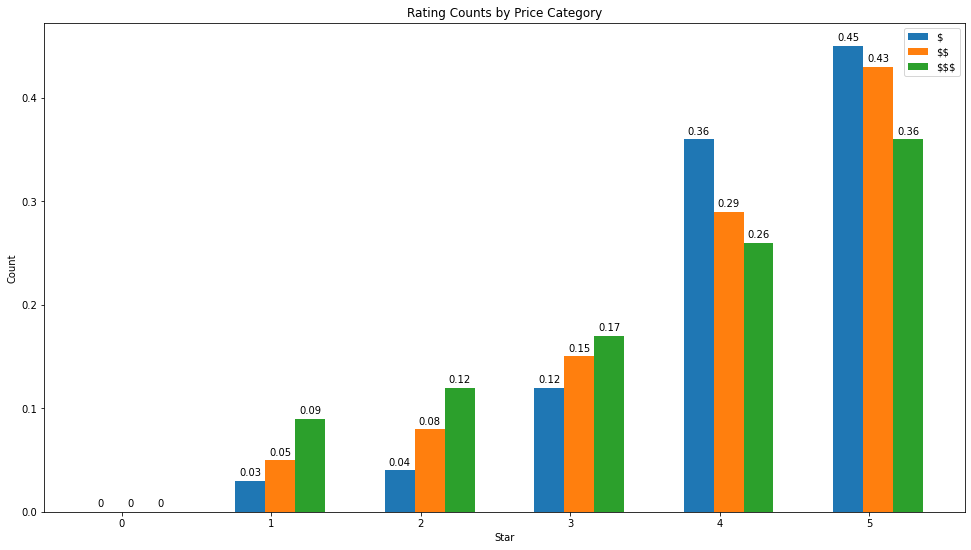

In [59]:
labels = [ '1.5 star', '1 star', '2 star', '3 star', '4 star', '5 star']
dollar = rating_dollar_map[:,0]
dollardollar = rating_dollar_map[:,1]
dollardollardollar = rating_dollar_map[:,2]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*1.5 + 0.16, dollar, width, label='\$')
rects2 = ax.bar(x -  width*.5 + 0.16, dollardollar, width, label='\$\$')
rects3 = ax.bar(x + 0.5 * width + 0.16, dollardollardollar, width, label='\$\$\$')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Star')
ax.set_title('Rating Counts by Price Category')

#ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
#fig.tight_layout()
fig = plt.gcf()
fig.set_size_inches(16.5, 9)
plt.show()

In [ ]:
import matplotlib
print(matplotlib. __version__)

In [ ]:
dollar_ratings

In [93]:
dollardollar_ratings

[7, 25529, 37308, 67904, 137960, 199569]

In [94]:
dollardollardollar_ratings

[1, 23126, 29584, 42099, 63834, 90325]

In [60]:
#     pickle.dump(req_users_info,fp)
with open("User_Info_req.pkl","rb") as fp:
    req_users = pickle.load(fp)

In [71]:
curr_locations = defaultdict(int)

for u in req_users:
    curr_locations[u['gPlusUserId']] = u['currentPlace']

In [75]:
cnt = 0
for d in data:
    if curr_locations[d['gPlusUserId']] is not None and curr_locations[d['gPlusUserId']]!= 0:
        cnt+=1

In [76]:
cnt

189126